# gyro-interp using TOI data
* https://gyro-interp.readthedocs.io/en/latest/examples.html

In [1]:
import sys

# make sure you are using `gyrointerp` environment
assert sys.executable.split('/')[5]=='gyrointerp'

In [2]:
# check if package is installed
!{sys.executable} -m pip show gyrointerp

Name: gyrointerp
Version: 0.5
Summary: Gyrochronology via interpolation of open cluster rotation sequences.
Home-page: https://github.com/lgbouma/gyro-interp
Author: Luke Bouma
Author-email: bouma.luke@gmail.com
License: MIT
Location: /mnt_ut3/raid_ut3/home/jerome/github/research/project/ext_tools/gyro-interp
Editable project location: /mnt_ut3/raid_ut3/home/jerome/github/research/project/ext_tools/gyro-interp
Requires: astropy, matplotlib, numpy, pandas, scipy
Required-by: 


## TOI data

In [39]:
import pandas as pd

# see youth_indicators_tois.ipynb
data = pd.read_csv('../data/youth_indicators_tois.csv')
data

,TOI,bv,bv_err,li,prot,rhk,teff,ruwe
0,101.01,0.656000,0.1,NaN,1.430321,NaN,5648.642857,NaN
1,102.01,0.507667,0.1,NaN,4.410011,NaN,6257.270417,NaN
2,103.01,0.291000,0.1,NaN,3.554638,NaN,6086.159167,NaN
3,104.01,0.545667,0.1,NaN,4.090360,NaN,6046.516250,NaN
4,105.01,0.687667,0.1,NaN,2.187803,NaN,5741.285333,NaN
...,...,...,...,...,...,...,...,...
4646,5378.01,1.174000,NaN,NaN,NaN,NaN,4676.843750,0.955114
4647,5379.01,0.458667,NaN,NaN,NaN,NaN,6316.347805,1.046806
4648,5380.01,0.461000,NaN,NaN,NaN,NaN,6420.325168,1.042541
4649,5382.01,0.560000,NaN,NaN,NaN,NaN,6263.408975,1.233940


In [40]:
# remove missing pair of data
data2 = data[['TOI','teff','prot']].dropna()
data2.shape

(610, 3)

In [42]:
data2['hostname'] = data2.TOI.apply(lambda x: 'TOI'+str(x)[:-3])
data2 = data2.drop_duplicates(subset='hostname', keep='first')
data2

,TOI,teff,prot,hostname
0,101.01,5648.642857,1.430321,TOI101
1,102.01,6257.270417,4.410011,TOI102
2,103.01,6086.159167,3.554638,TOI103
3,104.01,6046.516250,4.090360,TOI104
4,105.01,5741.285333,2.187803,TOI105
...,...,...,...,...
4462,5173.01,5301.268916,16.690001,TOI5173
4494,5209.01,5472.714000,38.450840,TOI5209
4627,5358.01,4717.052536,6.900000,TOI5358
4643,5375.01,4061.779763,1.900000,TOI5375


## filter

In [ ]:
# we gyro model rotp limit
short_period = data2.prot<=15
# gyro-interp is only useful for FGK type stars
fgk_star = (data2.teff>=3500) & (data2.teff<6500)
# use only precise rotp values
precise_rotp = (0.5/data2.prot)<0.1

# apply filter
df_final = df[short_period & fgk_star & precise_rotp]
df_final.shape #34 host stars

## run fit

In [45]:
from gyrointerp import gyro_age_posterior_list, get_summary_statistics

Teffs = df_final.teff
Teff_errs = np.zeros_like(df_final.teff)+150
Prots = df_final.prot
Prot_errs =np.zeros_like(df_final.prot)+0.5
# Let's pass optional star IDs to name the posterior csv files.
star_ids = df_final.hostname

# The output posteriors will be cached at ~/.gyrointerp_cache/{cache_id}
cache_id = 'TOI'

#typically, Prot<17 has age < 1 Gy
age_grid = np.linspace(0, 5000, 500)

print(f"Running {len(star_ids)} targets...")

# This function will compute the posteriors, and cache them to CSV files
csvpaths = gyro_age_posterior_list(
    cache_id, 
    Prots, 
    Teffs, 
    Prot_errs=Prot_errs, 
    Teff_errs=Teff_errs,
    star_ids=star_ids, 
    age_grid=age_grid, 
    bounds_error="4gyrextrap", #"4gyrlimit",
    interp_method="pchip_m67"
)

[I 250329 14:45:22 gyro_posterior:751] Got N_tasks=590...
[I 250329 14:45:22 gyro_posterior:752] 2025-03-29T14:45:22.070694 beginning gyro_age_posterior_list


Running 590 targets...


[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI153_Prot7.6329_Teff6289.3_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI135_Prot4.1000_Teff6726.6_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI264_Prot2.2168_Teff6215.5_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI394_Prot0.3915_Teff6221.3_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI415_Prot3.6113_Teff6551.7_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI449_Prot2.1751_Teff6422.8_limitgrid_defaultparameters_posterior.csv
[I 250329 14:45:24 gyro_posterior:518] Wrote /ut3/jerome/.gyrointerp_cache/TOI/TOI453_Prot2.7044_Tef

## read posteriors

In [50]:
# import custom code from the `code` directory
import sys
sys.path.insert(0, '../code')

In [51]:
from pathlib import Path

outdir = 'TOI'
csvpaths = list(Path(f'/ut3/jerome/.gyrointerp_cache/{outdir}/').glob('*_posterior.csv'))
csvpaths[:3]

[PosixPath('/ut3/jerome/.gyrointerp_cache/TOI/TOI2883_Prot3.7064_Teff5845.9_limitgrid_defaultparameters_posterior.csv'),
 PosixPath('/ut3/jerome/.gyrointerp_cache/TOI/TOI394_Prot0.3915_Teff6221.3_limitgrid_defaultparameters_posterior.csv'),
 PosixPath('/ut3/jerome/.gyrointerp_cache/TOI/TOI4584_Prot35.7010_Teff5661.4_limitgrid_defaultparameters_posterior.csv')]

In [ ]:
from kenmon import plot_age_posterior
from gyrointerp import get_summary_statistics
import numpy as np
import pandas as pd
import traceback

# Read the posteriors and print their summary statistics.
results = {}
for csvpath in sorted(csvpaths):
    try:
        parts = csvpath.name.split('/')[-1].split('_')
        name = parts[0]
        Prot = float(parts[1][4:])
        Teff = float(parts[2][4:])
        # add padding e.g. TOI200 = TOI0200
        name = 'TOI'+name[3:].zfill(4)
        # read data
        df = pd.read_csv(csvpath)
        age_grid = df.age_grid.values
        age_post = df.age_post.values
        r = get_summary_statistics(age_grid, age_post)
        if np.isfinite(r['median']):            
            results[name] = {'Prot': Prot,
                             'Teff': Teff,
                             'age_med': r['median'],
                             'age_lo': r['-1sigma'],
                             'age_hi': r['+1sigma']
            }
            if True:
                # plot
                xlim = (r['median']-r['-3sigma'], r['median']+r['+3sigma'])
                # msg = f"Age = {r['median']} +{r['+1sigma']} -{r['-1sigma']} Myr."
                # print(f"Teff {int(Teff)} Prot {Prot:.2f} {msg}")

                fig = plot_age_posterior(name, Prot, Teff, age_post, r, age_grid, xlim=xlim)
                # save plot
                fp = f'{outdir}/{name}_age_gyro.png'
                fig.savefig(fp, bbox_inches='tight')     
        
        results = pd.DataFrame(results)
    except Exception as e:
        print(name,e)
        print(traceback.format_exc())
        break

In [55]:
results.T.head()

,Prot,Teff,age_med,age_lo,age_hi
TOI0101,1.4303,5648.6,71.44,48.77,105.07
TOI0103,3.5546,6086.2,286.99,147.62,221.00
TOI1049,2.1806,6186.5,128.36,87.88,119.08
TOI0104,4.0904,6046.5,358.55,155.84,311.66
TOI0105,2.1878,5741.3,68.53,46.78,75.62


In [56]:
results.T.to_csv(f'{outdir}/{outdir}_gyro_results.csv')

In [57]:
outdir = 'TOI'
gyro_age = pd.read_csv(f'{outdir}/{outdir}_gyro_results.csv', index_col=0)
gyro_age = gyro_age.reset_index(names='TOI').dropna().sort_values(by='TOI')
gyro_age.shape

(430, 6)

In [58]:
gyro_age['hostname'] = gyro_age.TOI.apply(lambda x: x.split('.')[0])
gyro_age = gyro_age.drop_duplicates(subset='hostname', keep='first')
gyro_age

,TOI,Prot,Teff,age_med,age_lo,age_hi,hostname
0,TOI0101,1.4303,5648.6,71.44,48.77,105.07,TOI0101
1,TOI0103,3.5546,6086.2,286.99,147.62,221.00,TOI0103
3,TOI0104,4.0904,6046.5,358.55,155.84,311.66,TOI0104
4,TOI0105,2.1878,5741.3,68.53,46.78,75.62,TOI0105
11,TOI0107,3.9668,6159.3,422.70,177.75,381.35,TOI0107
...,...,...,...,...,...,...,...
374,TOI5170,21.2043,5810.0,3288.70,377.18,409.26,TOI5170
375,TOI5173,16.6900,5301.3,1830.02,104.78,121.13,TOI5173
376,TOI5209,38.4508,5472.7,4971.68,44.27,20.97,TOI5209
379,TOI5358,6.9000,4717.1,127.00,78.61,146.86,TOI5358


In [59]:
th = 0.5
idx1 = (gyro_age.age_hi/gyro_age.age_med)<th
idx2 = (gyro_age.age_lo/gyro_age.age_med)<th
gyro_age = gyro_age[idx1 & idx2]
gyro_age

,TOI,Prot,Teff,age_med,age_lo,age_hi,hostname
30,TOI0125,9.1506,5166.9,652.65,151.36,141.15,TOI0125
75,TOI0190,10.0216,6021.4,1818.71,641.32,800.99,TOI0190
80,TOI0191,7.2568,5570.9,501.00,110.26,99.02,TOI0191
124,TOI0246,7.8729,5081.8,377.39,158.07,152.83,TOI0246
153,TOI0283,8.8108,5243.1,622.29,137.13,125.53,TOI0283
...,...,...,...,...,...,...,...
371,TOI5165,25.1700,4733.3,2945.44,130.93,159.57,TOI5165
372,TOI5168,18.7600,5157.5,2072.95,94.57,106.40,TOI5168
374,TOI5170,21.2043,5810.0,3288.70,377.18,409.26,TOI5170
375,TOI5173,16.6900,5301.3,1830.02,104.78,121.13,TOI5173


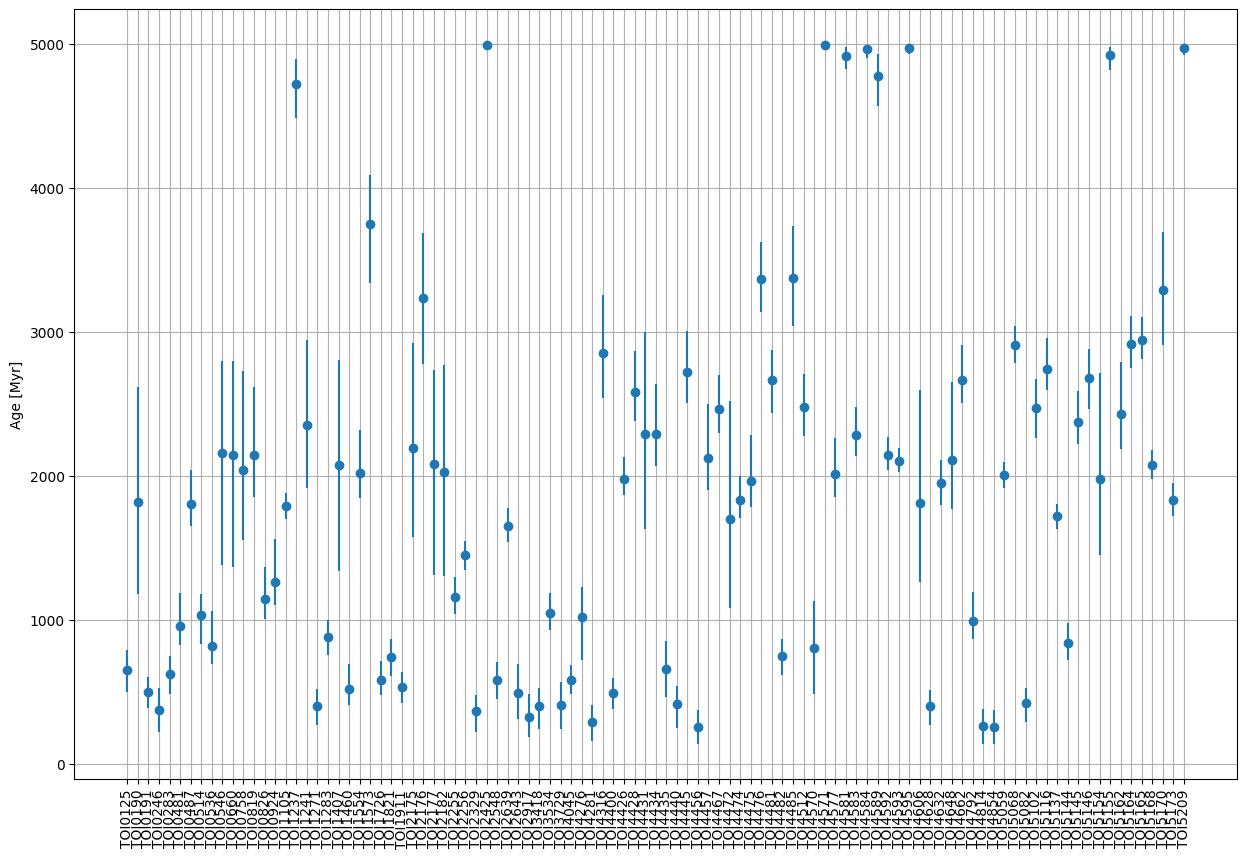

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
gyro_age = gyro_age.sort_values(by='hostname')
x = gyro_age.hostname
y = gyro_age.age_med
yerr1 = gyro_age.age_lo
yerr2 = gyro_age.age_hi
plt.errorbar(x, y, yerr=[yerr1, yerr2], marker='o', ls='')
plt.xticks(rotation=90);
plt.ylabel('Age [Myr]')
plt.grid()

In [61]:
gyro_age.age_med.min(), gyro_age.age_med.max()

(np.float64(257.39), np.float64(4994.62))

[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 models:612] Star is older than the oldest reference cluster...
[I 250329 14:53:55 models:613] 	...You have chosen to not attempt extrapolation.
[I 250329 14:53:55 mod

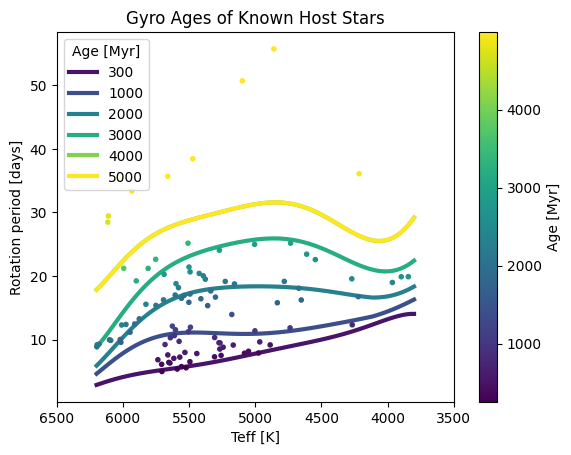

In [62]:
from gyrointerp.models import slow_sequence
from matplotlib.colors import ListedColormap
import numpy as np

tmin, tmax = gyro_age.age_med.min(), gyro_age.age_med.max()
Tmin, Tmax = 3800, 6200
slow_seq_ages = [round(tmin/100)*100,
                 1000,
                 2000,
                 3000,
                 4000,
                 round(tmax/1000)*1000]
Nages = len(slow_seq_ages)
Teff = np.linspace(Tmin, Tmax, 100)
colors = ListedColormap(plt.cm.viridis(np.linspace(tmin/tmax, 1, Nages))).colors

fig, ax = plt.subplots()

for i,slow_seq_age in enumerate(slow_seq_ages):
    Prot = slow_sequence(
        Teff, slow_seq_age, poly_order=7,
        interp_method='pchip_m67'
    )
    ax.plot(
        Teff, Prot, color=colors[i], linewidth=3, zorder=-1, label=f"{slow_seq_age}"
    )

# this work
s = ax.scatter(gyro_age.Teff, gyro_age.Prot, marker='.', c=gyro_age.age_med)
# yerr = gyro_age.Prot_
# s = ax.errorbar(gyro_age.Teff, gyro_age.Prot, yerr=[yerrf], xerr=xerr, marker='.', c=gyro_age.age_med)
fig.colorbar(s, label='Age [Myr]')
ax.update({
    'xlabel': 'Teff [K]',
    'ylabel': 'Rotation period [days]',
    'title': 'Gyro Ages of Known Host Stars',
    'xlim': [3500, 6500],
    });
ax.xaxis.set_inverted(True)
ax.legend(title='Age [Myr]', loc='upper left')

## candidates

In [63]:
short_list = gyro_age[gyro_age['age_hi']<1000]
short_list

,TOI,Prot,Teff,age_med,age_lo,age_hi,hostname
30,TOI0125,9.1506,5166.9,652.65,151.36,141.15,TOI0125
75,TOI0190,10.0216,6021.4,1818.71,641.32,800.99,TOI0190
80,TOI0191,7.2568,5570.9,501.00,110.26,99.02,TOI0191
124,TOI0246,7.8729,5081.8,377.39,158.07,152.83,TOI0246
153,TOI0283,8.8108,5243.1,622.29,137.13,125.53,TOI0283
...,...,...,...,...,...,...,...
371,TOI5165,25.1700,4733.3,2945.44,130.93,159.57,TOI5165
372,TOI5168,18.7600,5157.5,2072.95,94.57,106.40,TOI5168
374,TOI5170,21.2043,5810.0,3288.70,377.18,409.26,TOI5170
375,TOI5173,16.6900,5301.3,1830.02,104.78,121.13,TOI5173


In [64]:
short_list.hostname.to_csv('toiid.txt', index=False, header=False)